In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
imgGray = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/2- 2D-scaling-Transformation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)

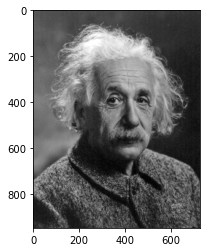

In [5]:
plt.imshow(imgGray, cmap='gray')

In [9]:
numRows = imgGray.shape[0]
numCols = imgGray.shape[1]
print(numRows, numCols)

949 728


In [13]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [14]:
S = np.array([[2, 0], [0, 2]])
I2 = np.zeros((2*numRows, 2*numCols), dtype='uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i, new_j])
        P = Tinv.dot(P_dash)
        #P = np.int16(np.round(P))
        i, j = P[0], P[1]
        if i<0 or j>=numRows or j<0 or j>=numCols: # out of the box
            pass
        else:
            g = f_bilinearInterpolate(i, j, imgGray)
            I2[new_i, new_j] = g

In [15]:
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    h, w = I.shape
    figSize = w/float(dpi), h/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

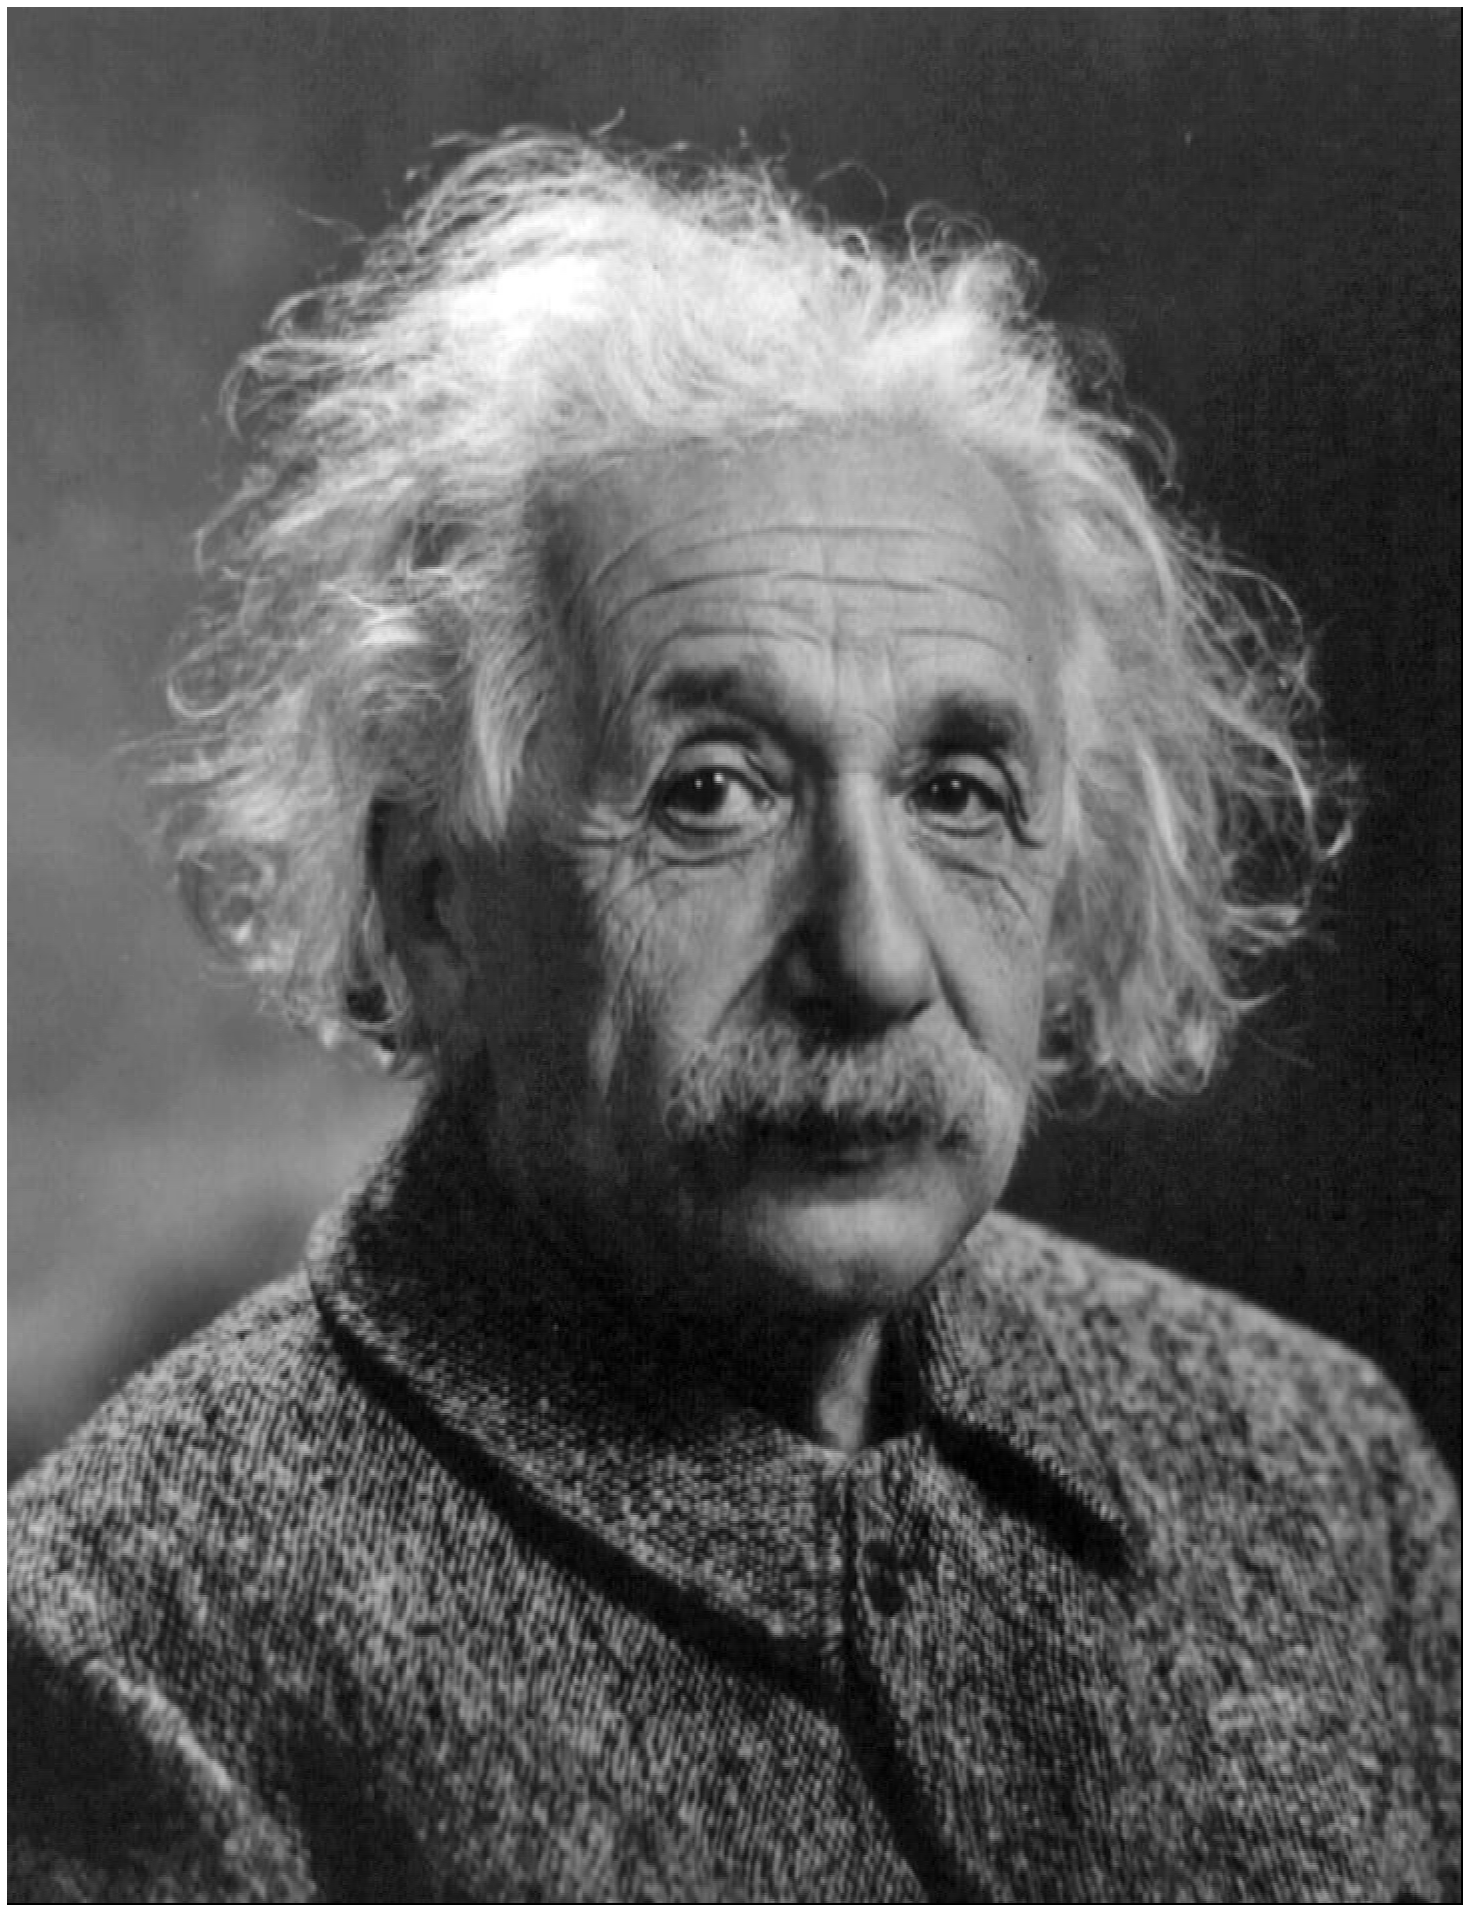

In [16]:
displayImageInActualSize(I2)